<a href="https://colab.research.google.com/github/am28012/Hands_on_project/blob/main/DTDC_Statistical_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('/content/DTDC.csv')
df.head()

,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment
0,Nagpur,Jamshedpur,55e275ad-8da9-49c9-986c-93134fef2c19,25-06-2025,Megha Majumdar,6137840452,"H.No. 425 Varughese Chowk, Above Shop, Nagpur,...",Nagpur,Maharashtra,264582,...,No,No,30-06-2025,? 147.22,? 70.09,? 217.31,Express,Carrier,Cash,Dox
1,Jaipur,Vizag,7fab4175-11b2-4090-a0ed-4571ccd68878,27-06-2025,Nanda-Saraf,52907142,"48/880, Tripathi, Above Shop, Jaipur, Rajastha...",Jaipur,Rajasthan,200155,...,No,No,28-06-2025,? 256.83,? 82.20,? 339.03,Surface,Carrier,Card,Dox
2,Lucknow,Bhubaneswar,5231428d-b524-433e-8043-45c7e39a94aa,27-06-2025,Contractor LLC,5081512738,"257, Kulkarni Path, Above Shop, Lucknow, Uttar...",Lucknow,Uttar Pradesh,353311,...,No,No,28-06-2025,? 432.45,? 107.63,? 540.08,Surface,Carrier,Cash,Non-Dox
3,Coimbatore,Mumbai,2f556b38-298d-4e8c-9310-4e6a3a5fbe61,11-06-2025,Krishna Hans,1518559754,"83/17 Sridhar Zila, Above Shop, Coimbatore, Ta...",Coimbatore,Tamil Nadu,553663,...,No,No,15-06-2025,"? 1,162.00",? 25.23,"? 1,187.23",Express,Carrier,Card,Non-Dox
4,Meerut,Vijayawada,c3154041-34eb-435e-94d8-0900e6a9ed01,01-07-2025,Kuruvilla-Tiwari,1666398391,"16/64 Jayaraman Circle, Above Shop, Meerut, Ut...",Meerut,Uttar Pradesh,273143,...,No,No,05-07-2025,? 285.55,? 67.70,? 353.25,Surface,Carrier,Cash,Dox


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null 

,Sender Phone,Sender Pincode,Total Pieces,Actual Wt,Volumetric Wt,Chargeable Wt,Recipient Phone,Receiver Pincode
count,4.963900e+04,49639.000000,49639.000000,49639.000000,49639.000000,49639.000000,4.963900e+04,49639.000000
mean,5.010054e+09,499786.484055,2.994480,6.167263,7.716568,7.716568,4.973767e+09,500547.941115
std,2.892645e+09,288607.647965,1.415086,3.375089,3.476748,3.476748,2.883664e+09,287851.384963
min,1.710800e+04,1.000000,1.000000,0.300000,0.440000,0.440000,2.289200e+05,2.000000
25%,2.479984e+09,248197.500000,2.000000,3.260000,4.800000,4.800000,2.473943e+09,252065.000000
50%,5.018929e+09,499479.000000,3.000000,6.190000,7.740000,7.740000,4.960678e+09,502320.000000
75%,7.533459e+09,748322.000000,4.000000,9.080000,10.640000,10.640000,7.459426e+09,749229.500000
max,9.999872e+09,999981.000000,5.000000,12.000000,14.970000,14.970000,9.999958e+09,999973.000000



Distribution of Mode:


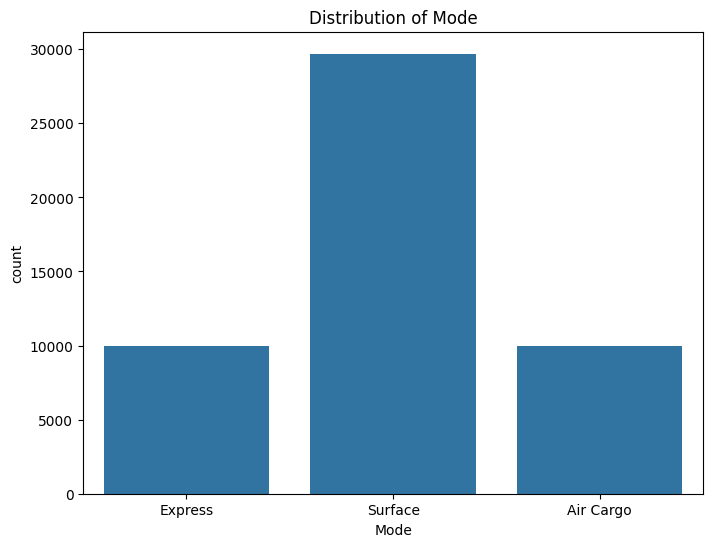


Unique values in 'Mode of Payment':
['Cash' 'Card' 'Wallet']

Unique values in 'Nature of Consignment':
['Dox' 'Non-Dox']


In [5]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

print("\nDistribution of Mode:")
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode', data=df)
plt.title('Distribution of Mode')
plt.show()

print("\nUnique values in 'Mode of Payment':")
print(df['Mode of Payment'].unique())

print("\nUnique values in 'Nature of Consignment':")
print(df['Nature of Consignment'].unique())

In [8]:
contingency_table = pd.crosstab(df['Mode of Payment'], df['Mode'])
print("Contingency Table:")
display(contingency_table)

Contingency Table:


Mode,Air Cargo,Express,Surface
Mode of Payment,,,
Card,3629,3593,10688
Cash,5917,6005,17882
Wallet,400,396,1129


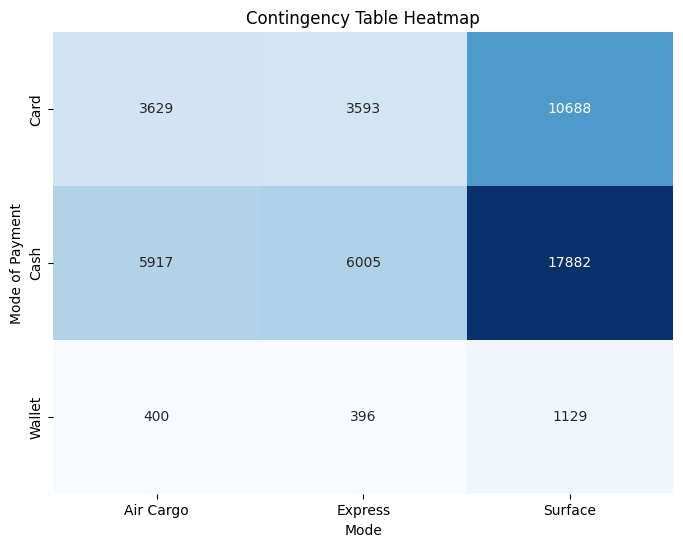

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table Heatmap')
plt.show()

In [11]:
df_model = df[['Mode', 'Mode of Payment']]
df_model_encoded = pd.get_dummies(df_model, columns=['Mode', 'Mode of Payment'], drop_first=True)
display(df_model_encoded.head())

,Mode_Express,Mode_Surface,Mode of Payment_Cash,Mode of Payment_Wallet
0,True,False,True,False
1,False,True,False,False
2,False,True,True,False
3,True,False,False,False
4,False,True,True,False


In [13]:
X = df_model_encoded.drop(columns=['Mode_Express', 'Mode_Surface'])
y = df_model_encoded['Mode_Express']

print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,Mode of Payment_Cash,Mode of Payment_Wallet
0,True,False
1,False,False
2,True,False
3,False,False
4,True,False



Target (y):


,Mode_Express
0,True
1,False
2,False
3,True
4,False


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [15]:
y_pred = model.predict(X)
print("First 10 predictions:")
print(y_pred[:10])

First 10 predictions:
[False False False False False False False False False False]


Classification Report:
              precision    recall  f1-score   support

       False       0.80      1.00      0.89     39645
        True       0.00      0.00      0.00      9994

    accuracy                           0.80     49639
   macro avg       0.40      0.50      0.44     49639
weighted avg       0.64      0.80      0.71     49639


Confusion Matrix:
[[39645     0]
 [ 9994     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


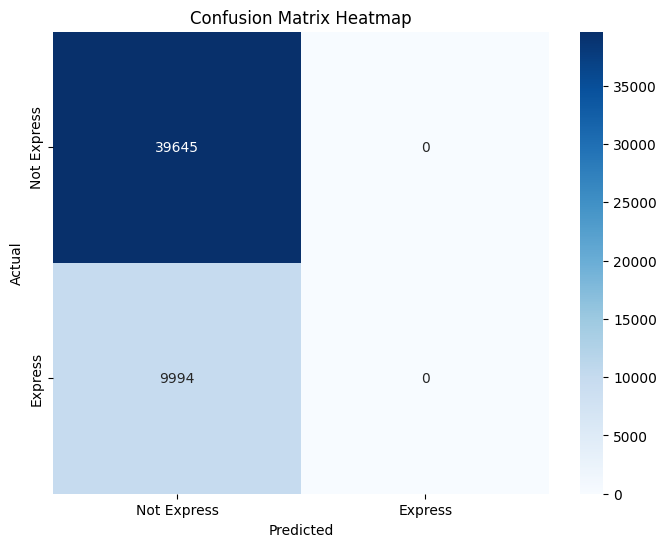

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Express', 'Express'], yticklabels=['Not Express', 'Express'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The logistic regression model trained to predict the delivery 'Mode' based on the 'Mode of Payment' achieved an overall accuracy of 80%.
*   The model completely failed to identify any 'Express' deliveries, with precision, recall, and f1-score for the 'Express' class (True) all being 0.
*   The confusion matrix showed that all 39,645 'Not Express' deliveries were correctly classified, while all 9,994 'Express' deliveries were misclassified as 'Not Express'.

### Insights or Next Steps

*   The 'Mode of Payment' alone is not a good predictor for the 'Mode' of delivery using this logistic regression model.
*   To improve the model's performance, additional relevant features should be considered for inclusion in the training data.


Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.79      1.00      0.89      7892
        True       0.00      0.00      0.00      2036

    accuracy                           0.79      9928
   macro avg       0.40      0.50      0.44      9928
weighted avg       0.63      0.79      0.70      9928


Confusion Matrix (Random Forest):
[[7892    0]
 [2036    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


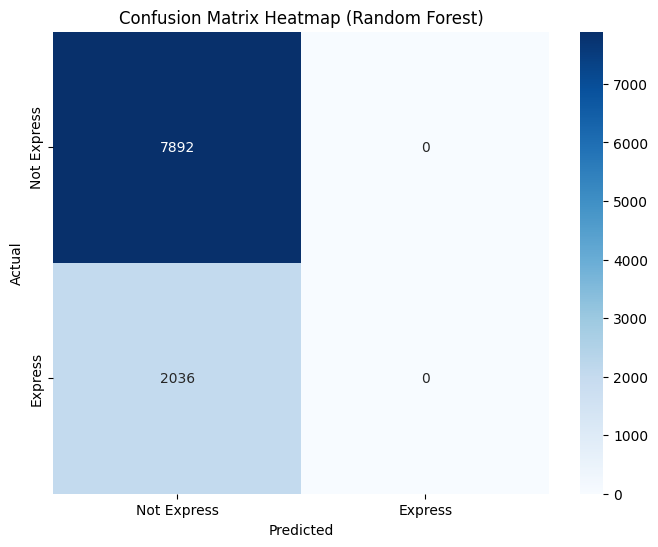

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_model_encoded.drop(columns=['Mode_Express', 'Mode_Surface'])
y = df_model_encoded['Mode_Express']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

#  predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Express', 'Express'], yticklabels=['Not Express', 'Express'])
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
df['Actual Wt'].isna()

,Actual Wt
0,False
1,False
2,False
3,False
4,False
...,...
49634,False
49635,False
49636,False
49637,False


Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.89      7892
        True       0.00      0.00      0.00      2036

    accuracy                           0.79      9928
   macro avg       0.40      0.50      0.44      9928
weighted avg       0.63      0.79      0.70      9928


Confusion Matrix:
[[7892    0]
 [2036    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


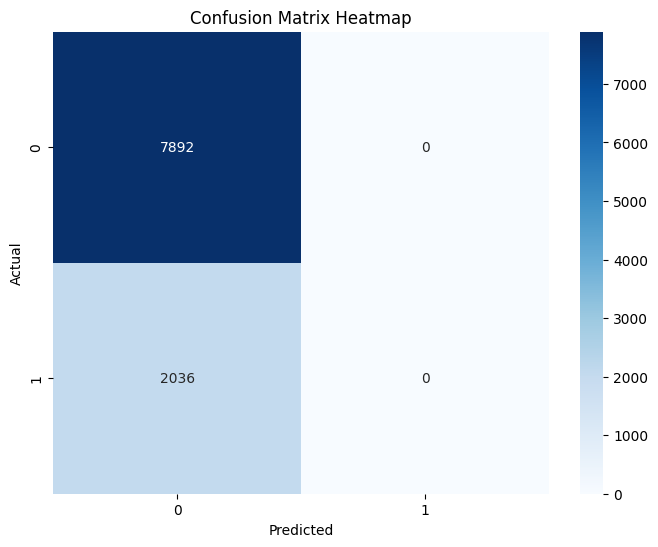

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_model = df[['Mode', 'Actual Wt']]


df_model_encoded = pd.get_dummies(df_model, columns=['Mode'], drop_first=True)

X = df_model_encoded[['Actual Wt']]
y = df_model_encoded['Mode_Express']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#  predictions
y_pred = model.predict(X_test)

#  Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
print("Random Forest Classifier trained successfully!")
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the scaled test set
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier trained successfully!
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.89      7892
        True       0.00      0.00      0.00      2036

    accuracy                           0.79      9928
   macro avg       0.40      0.50      0.44      9928
weighted avg       0.63      0.79      0.70      9928


Random Forest Confusion Matrix:
[[7892    0]
 [2036    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
